# Fourier Transform

A large fraction of problems in physics and engineering falls into the subject of Fourier Transform. This can also be found under the name of signal processing or spectral methods.

The key concept behind this tool is the decomposition of a function into an infinite sum of sines and cosines.

In this section we will focus on the discrete definition of the Fourier Transform. We start with the FT definition in a continuous case:

$$
\hat{f}(\nu) = F[f] = \int_{-\infty}^{\infty} f(t) \exp (-2\pi i \nu t)dt
$$

This takes the real function $f(t)$ and returns the complex function $\hat{f}(\nu)$.

What does this $\hat{f}(\nu)$ represents? Loosely speaking, the value of $\hat{f}(\nu)$ is the complex amplitude that the functions $\cos(2\pi\nu t)$ and $\sin (2\pi\nu t)$ must have in the decomposition of the function of $f(t)$ as an infinite sum of periodic functions.

Interestingly enough, for well-behaved functions [citation needed], it is possible to get the $f$ from $\hat{f}(\nu)$ taking the inverse of the FT.

$$
f(t) = F^{-1}[\hat{f}(\nu)] = \int_{-\infty}^{\infty} \hat{f}(\nu) \exp (+2\pi i \nu t)d\nu
$$

Now let's supose that we have a sequence of real numbers \{ $x_{n}$ \} with values $x_0\ldots x_{N-1}$. It is possible to define a discrete FT as a sampled version of the continous FT:


$$
\hat{x_k}= \sum_{n=0}^{N-1} x_{n} \exp(-2\pi i nk /N)
$$

and the inverse can be defined as

$$
x_k = \sum_{n=0}^{N-1} \hat{x}_{n}\exp(+2\pi i nk / N).
$$

## Discrete Fourier Transform (DFT) Definition
$$G(\frac{n}{N}) = \sum_{k=0}^{N-1} g(k) e^{-i 2 \pi k \frac{n}{N} }$$

**Meaning**:

* $N$ is the total number of samples
* $g(k)$ is the kth sample for the time-domain function (i.e. the DFT input)
* $G(\frac{n}{N})$ is the output of the DFT for the frequency that is $\frac{n}{N}$ cycles per sample; so to get the frequency, you have to multiply $n/N$ by the sample rate.

In what follows we present the simplest example in Python where we take the FT of a periodic signal and recover the amplitudes and frequencies of the sine functions that generated the original function.

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
n = 128 # number of point in the whole interval
f = 200.0 #  frequency in Hz
dt = 1 / (f * 32 ) #32 samples per unit frequency
t = np.linspace( 0, (n-1)*dt, n)
y = np.cos(2 * np.pi * f * t)

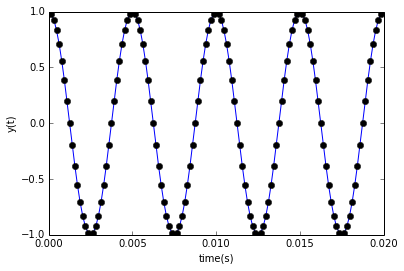

In [5]:
plt.plot(t,y)
plt.plot(t,y, 'ko')
plt.xlabel('time(s)')
plt.ylabel('y(t)')

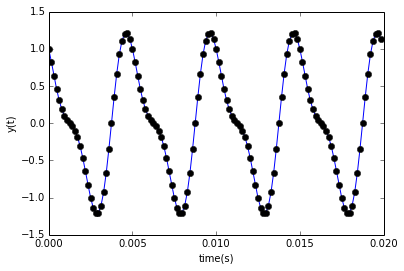

In [6]:
y = np.cos(2 * np.pi * f * t) - 0.4 * np.sin(2 * np.pi * (2*f) * t )
plt.plot(t,y)
plt.plot(t,y, 'ko')
plt.xlabel('time(s)')
plt.ylabel('y(t)')

Now we get the fourier transform of this discrete signal. 

[    0.    50.   100.   150.   200.   250.   300.   350.   400.   450.
   500.   550.   600.   650.   700.   750.   800.   850.   900.   950.
  1000.  1050.  1100.  1150.  1200.  1250.  1300.  1350.  1400.  1450.
  1500.  1550.  1600.  1650.  1700.  1750.  1800.  1850.  1900.  1950.
  2000.  2050.  2100.  2150.  2200.  2250.  2300.  2350.  2400.  2450.
  2500.  2550.  2600.  2650.  2700.  2750.  2800.  2850.  2900.  2950.
  3000.  3050.  3100.  3150. -3200. -3150. -3100. -3050. -3000. -2950.
 -2900. -2850. -2800. -2750. -2700. -2650. -2600. -2550. -2500. -2450.
 -2400. -2350. -2300. -2250. -2200. -2150. -2100. -2050. -2000. -1950.
 -1900. -1850. -1800. -1750. -1700. -1650. -1600. -1550. -1500. -1450.
 -1400. -1350. -1300. -1250. -1200. -1150. -1100. -1050. -1000.  -950.
  -900.  -850.  -800.  -750.  -700.  -650.  -600.  -550.  -500.  -450.
  -400.  -350.  -300.  -250.  -200.  -150.  -100.   -50.]


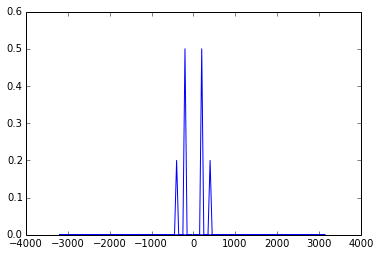

In [7]:
from scipy.fftpack import fft, fftfreq
fft_x = fft(y) / n # FFT Normalized
freq = fftfreq(n, dt) # Recuperamos las frecuencias
print(freq)
plt.plot(freq,abs(fft_x))
#print(freq)

In [10]:
fft_x_shifted = np.fft.fftshift(fft_x)
freq_shifted = np.fft.fftshift(freq)
print(freq_shifted)

[-3200. -3150. -3100. -3050. -3000. -2950. -2900. -2850. -2800. -2750.
 -2700. -2650. -2600. -2550. -2500. -2450. -2400. -2350. -2300. -2250.
 -2200. -2150. -2100. -2050. -2000. -1950. -1900. -1850. -1800. -1750.
 -1700. -1650. -1600. -1550. -1500. -1450. -1400. -1350. -1300. -1250.
 -1200. -1150. -1100. -1050. -1000.  -950.  -900.  -850.  -800.  -750.
  -700.  -650.  -600.  -550.  -500.  -450.  -400.  -350.  -300.  -250.
  -200.  -150.  -100.   -50.     0.    50.   100.   150.   200.   250.
   300.   350.   400.   450.   500.   550.   600.   650.   700.   750.
   800.   850.   900.   950.  1000.  1050.  1100.  1150.  1200.  1250.
  1300.  1350.  1400.  1450.  1500.  1550.  1600.  1650.  1700.  1750.
  1800.  1850.  1900.  1950.  2000.  2050.  2100.  2150.  2200.  2250.
  2300.  2350.  2400.  2450.  2500.  2550.  2600.  2650.  2700.  2750.
  2800.  2850.  2900.  2950.  3000.  3050.  3100.  3150.]


(0, 1000)

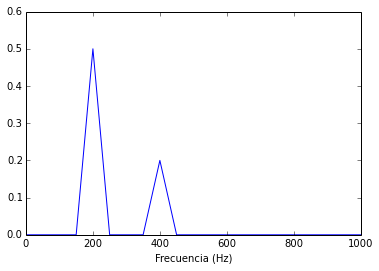

In [11]:
plt.plot(freq_shifted, np.abs(fft_x_shifted))
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0,1000)

In [16]:
half_n = np.ceil(n/2.0)
fft_x_half = (2.0) * fft_x[:half_n]
freq_half = freq[:half_n]

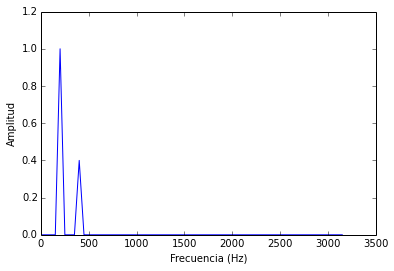

In [18]:
plt.plot(freq_half, np.abs(fft_x_half))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")

## Preguntas:

### Que se obtiene con la transformada de fourier?

### Cuáles frecuencias sinusoidales se utilizan? Explique con un ejemplo.













--


#Filtering
The FT is also used to process signals. In the following example, we will generate a sinusoidal signal with noise included. We will try to remove the noise using FT methods

In [20]:
n = 512 # number of point in the whole interval
f = 200.0 #  frequency in Hz
dt = 1 / (f * 128 ) #128 samples per frequency
t = np.linspace( 0, (n-1)*dt, n) 
y = np.sin(2 * np.pi * f * t) + np.cos(2 * np.pi * f * t * t)
noise = 1.4*(np.random.rand(n)+0.7)
y  =  y + noise

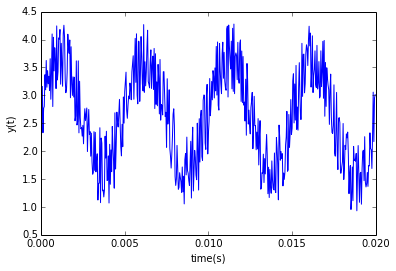

In [22]:
plt.plot(t,y)
plt.xlabel('time(s)')
plt.ylabel('y(t)')

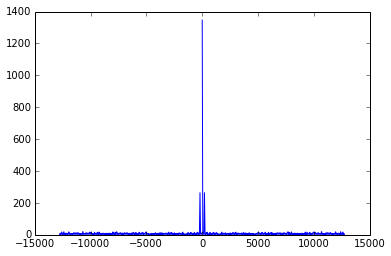

In [34]:
fft_x = fft(y) # FFT Normalized
freq = fftfreq(n, dt) # frequencies
plt.plot(freq,abs(fft_x))

(-2000, 2000)

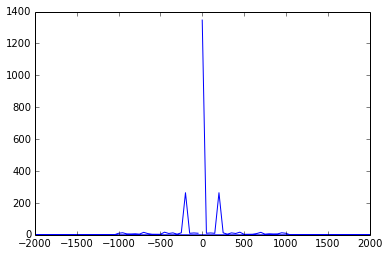

In [42]:
#set to 0 the values of the transform that are high:
freq_cut = 1000
fft_x[abs(freq) > freq_cut] = 0
plt.plot(freq,abs(fft_x))
plt.xlim([-2000,2000])

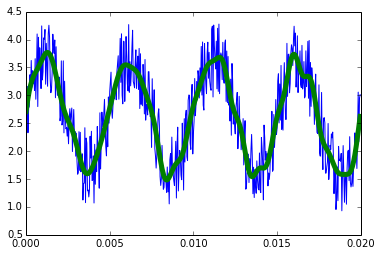

In [45]:
clean_f = np.fft.ifft(fft_x) 
plt.plot(t,y)
plt.plot(t,np.real(clean_f), linewidth=5, color='green')

#2D Fourier Transform - Convolution/Deconvolution

The convolution of a function $f(t)$ with a kernel $K(t)$ is defined as:
$$
\tilde{f}(t) = \int dt^{\prime}K(t-t^{\prime})f(t^{\prime})
$$

In terms of the Fourier transform,
$$
F[\tilde{f}(t)] = F[K(t)] F[f(t)]
$$

which means that one can find the convolved function by making the product of two FT (kernel and function), and then taking the inverse FT.

We will apply this to an image. The kernel will be a gaussian 2D function. The result: a smoothed image.


In [48]:
#code credit: http://scipy-lectures.github.com/intro/scipy.html#fast-fourier-transforms-scipy-fftpack

from scipy import fftpack
from scipy.signal import convolve2d
# read image
img = plt.imread('uniandes.png')
print(np.shape(img))

# prepare an 1-D Gaussian convolution kernel
t = np.linspace(-10, 10, 20)
bump = np.exp(-0.05*t**2)
bump = bump / np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]
print(img.shape[:2])

# padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real


# convolve again

#ghost = convolve2d(img[:,:], kernel)
#imshow(ghost, cmap = cm.gray, interpolation='nearest')
#colorbar()

(399, 615, 4)
(399, 615)


In [51]:
kernel

array([[  8.03384923e-07,   2.17778563e-06,   5.28427371e-06,
          1.14771540e-05,   2.23131993e-05,   3.88300728e-05,
          6.04857812e-05,   8.43367985e-05,   1.05259101e-04,
          1.17592853e-04,   1.17592853e-04,   1.05259101e-04,
          8.43367985e-05,   6.04857812e-05,   3.88300728e-05,
          2.23131993e-05,   1.14771540e-05,   5.28427371e-06,
          2.17778563e-06,   8.03384923e-07],
       [  2.17778563e-06,   5.90345935e-06,   1.43244104e-05,
          3.11118374e-05,   6.04857812e-05,   1.05259101e-04,
          1.63962580e-04,   2.28617021e-04,   2.85332411e-04,
          3.18766283e-04,   3.18766283e-04,   2.85332411e-04,
          2.28617021e-04,   1.63962580e-04,   1.05259101e-04,
          6.04857812e-05,   3.11118374e-05,   1.43244104e-05,
          5.90345935e-06,   2.17778563e-06],
       [  5.28427371e-06,   1.43244104e-05,   3.47573721e-05,
          7.54911148e-05,   1.46765329e-04,   2.55405258e-04,
          3.97845932e-04,   5.54726277e-04

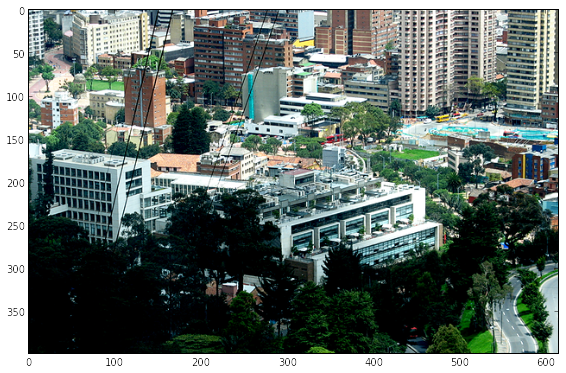

In [16]:
# plot output
fig = figure(1, figsize=(9.5,9))
imshow(img)


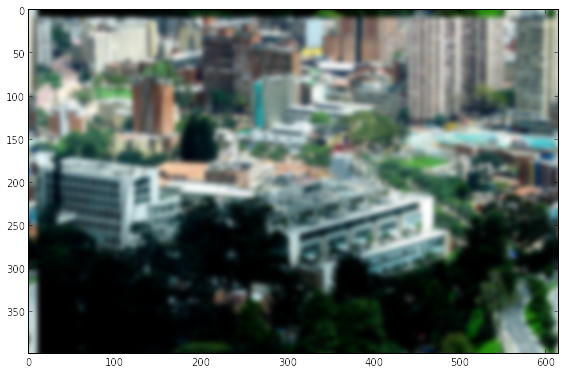

In [17]:
fig = figure(1, figsize=(9.5,9))
imshow(img2)

# Power Spectrum

The power spectrum is a very useful quantity to classify or generate signals. 

For instance, let's generate a signal from random numbers and take its power spectrum

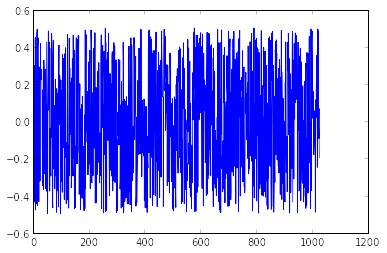

In [18]:
n_points  = 1024
rand_signal  = random.random(n_points) 
rand_signal = rand_signal -  np.mean(rand_signal)
plot(rand_signal)

(-0.05, 0.05)

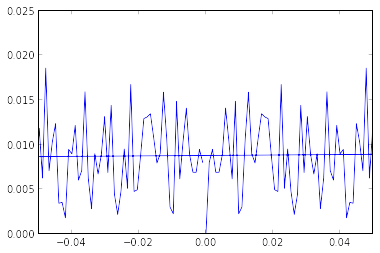

In [19]:
fft_rand_signal = fft(rand_signal) / n_points 
freq = fftfreq(n_points, 1) 
plt.plot(freq,np.abs(fft_rand_signal))
plt.xlim(-0.05,0.05)

The power spectrum is described by the square of the norm of each fourier component at a given frequency

In [20]:
half_n = np.ceil(n_points/2.0)
fft_rand_signal_half = (2.0) * fft_rand_signal[:half_n]
freq_half = freq[:half_n]

(-6, -1)

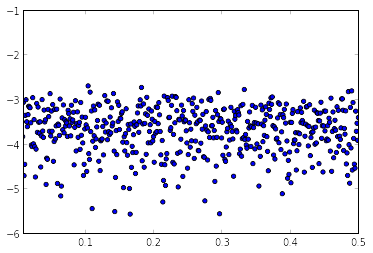

In [21]:
scatter(freq_half, log10(np.absolute(fft_rand_signal_half)**2)) 
plt.xlim([0.01,0.5])
plt.ylim([-6,-1])

### Additional reading:
http://scipy-lectures.github.com/intro/scipy.html#fast-fourier-transforms-scipy-fftpack

http://www.mat.ucsb.edu/201A/
